<a href="https://colab.research.google.com/github/AndreaHernandez5072/CienciaDatos/blob/main/MulticlasePolinomial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.preprocessing import PolynomialFeatures
#svm -> suport virtual machine
from sklearn.svm import SVC

In [5]:
df = sns.load_dataset('iris')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [11]:
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [12]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [13]:
df["species"].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [16]:
cleanup={"species":{'setosa':0,'versicolor':1,'virginica':2}}
df=df.replace(cleanup)

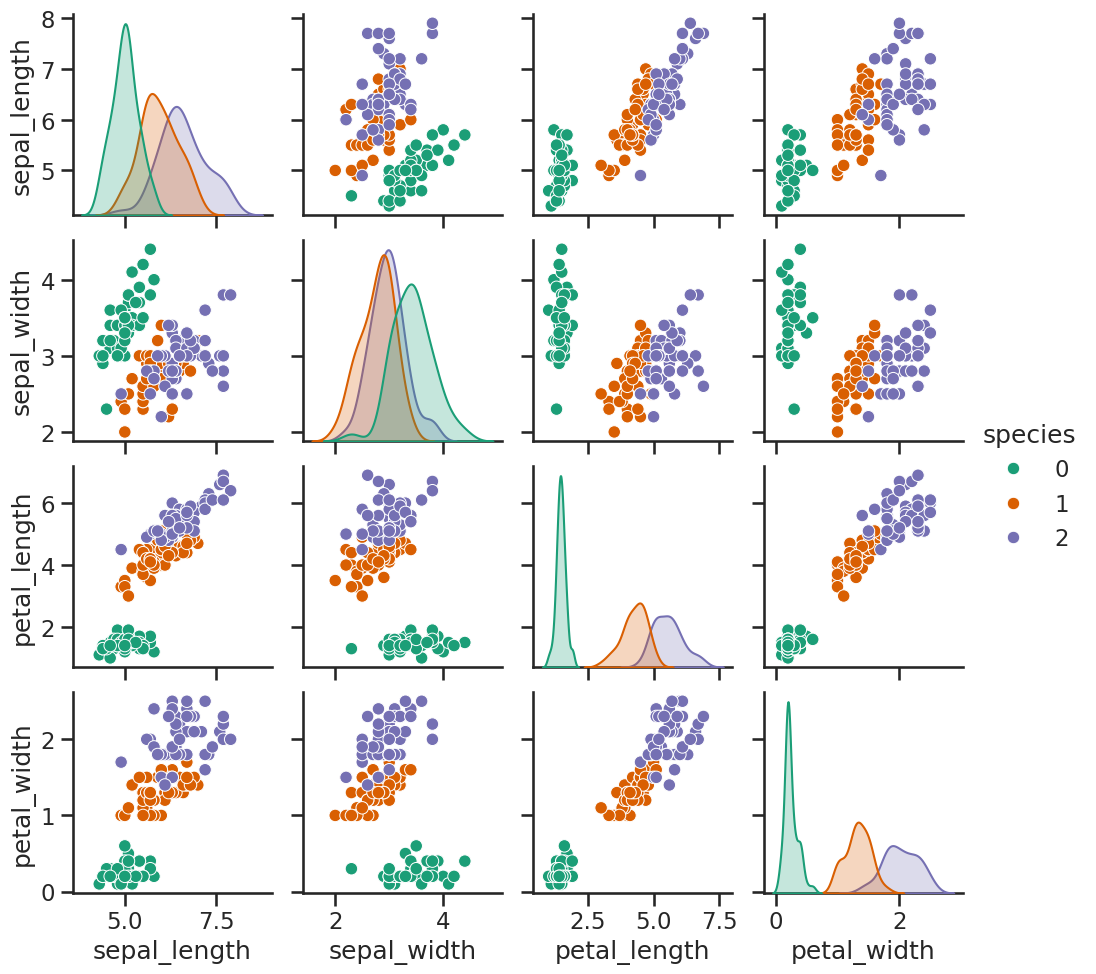

In [20]:
sns.pairplot(df,hue="species",palette="Dark2")

# Regresion lineal

In [22]:
X = df.drop(["species"],axis=1)
Y = df["species"]

x_train,x_test,y_train,y_test=train_test_split(X,Y,random_state=25,test_size=0.2)

In [26]:
#Entrenando modelo
modeloLR = LinearRegression().fit(x_train,y_train)
#Efectuar predicion
y_hat=modeloLR.predict(x_test)
y_hat
#Evaluar el modelo
print(confusion_matrix(y_test,y_hat.round()))
print(classification_report(y_test,y_hat.round()))

[[ 9  0  0]
 [ 0 12  1]
 [ 0  1  7]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       0.92      0.92      0.92        13
           2       0.88      0.88      0.88         8

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



# Regresion polinomial

In [36]:
#Degree es la cantidad de clases menos uno
poly = PolynomialFeatures(degree=2,include_bias=False)
polyFeatures = poly.fit_transform(x_train.to_numpy())
polyFeatures_test= poly.fit_transform(x_test.to_numpy())

#Entrenando modelo
ModelPoly=LinearRegression().fit(polyFeatures,y_train)
#Efectuar predicion
y_hat=ModelPoly.predict(polyFeatures_test)
y_hat
#Evaluar el modelo
print(confusion_matrix(y_test,y_hat.round()))
print(classification_report(y_test,y_hat.round()))


[[ 9  0  0]
 [ 0 13  0]
 [ 0  1  7]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       0.93      1.00      0.96        13
           2       1.00      0.88      0.93         8

    accuracy                           0.97        30
   macro avg       0.98      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30



# SVM

In [42]:
svmmodel=SVC()
#Entrenamiento del modelo
svmmodel.fit(x_train,y_train)
#Proabndo las prediciones
y_hat=svmmodel.predict(x_test)
y_hat
#Evaluar el modelo
print(confusion_matrix(y_test,y_hat.round()))
print(classification_report(y_test,y_hat.round()))

#macroAVG en f1-score es indicados de como está el modelo

[[ 9  0  0]
 [ 0 12  1]
 [ 0  0  8]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      0.92      0.96        13
           2       0.89      1.00      0.94         8

    accuracy                           0.97        30
   macro avg       0.96      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30

